## BigMart Sales prediction







# Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

#Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

# Description:
1. Item_Identifier: Unique product ID
2. Item_Weight: Weight of product
3. Item_Fat_Content: Whether the product is low fat or not
4. Item_Visibility: The % of total display area of all products in a store allocated to the particular product
5. tem_Type: The category to which the product belongs
6. Item_MRP: Maximum Retail Price (list price) of the product
7. Outlet_Identifier: Unique store ID
8. Outlet_Establishment_Year: The year in which store was established
9. Outlet_Size: The size of the store in terms of ground area covered
10. Outlet_Location_Type: The type of city in which the store is located
11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
12. Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/BigMart_train.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.shape

(8523, 12)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(8523, 12)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df['Item_Identifier'].nunique()

1559

In [9]:
df['Item_Weight'].isnull().sum()/len(df)*100

17.165317376510618

In [10]:
feature_na =  [feature for feature in df.columns if df[feature].isnull().sum() > 1]
feature_na

['Item_Weight', 'Outlet_Size']

In [11]:
for feature in feature_na:
  print("{} has {} % missing values".format(feature ,  np.round(df[feature].isnull().sum()/len(df)*100 , 2)))

Item_Weight has 17.17 % missing values
Outlet_Size has 28.28 % missing values


In [12]:
df = df.drop(['Item_Identifier' , 'Outlet_Identifier'] , axis = 1)

In [13]:
df.shape

(8523, 10)

In [14]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
#Numerical Feature
numerical_feature = df.dtypes[df.dtypes!='object'].index
print('numerical feature:' , len(numerical_feature))

categorical_feature = df.dtypes[df.dtypes=='object'].index
print('categorical feature:' , len(categorical_feature))

numerical feature: 5
categorical feature: 5


In [16]:
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [18]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness 1.177531
kurtosis 1.615877


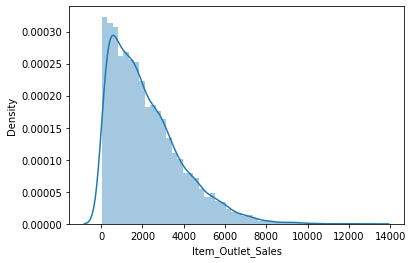

In [19]:
#Skewness and kurtosis for target variable
sns.distplot(df['Item_Outlet_Sales'])
print('skewness %f' % df['Item_Outlet_Sales'].skew())
print('kurtosis %f' % df['Item_Outlet_Sales'].kurt())

##Univariate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

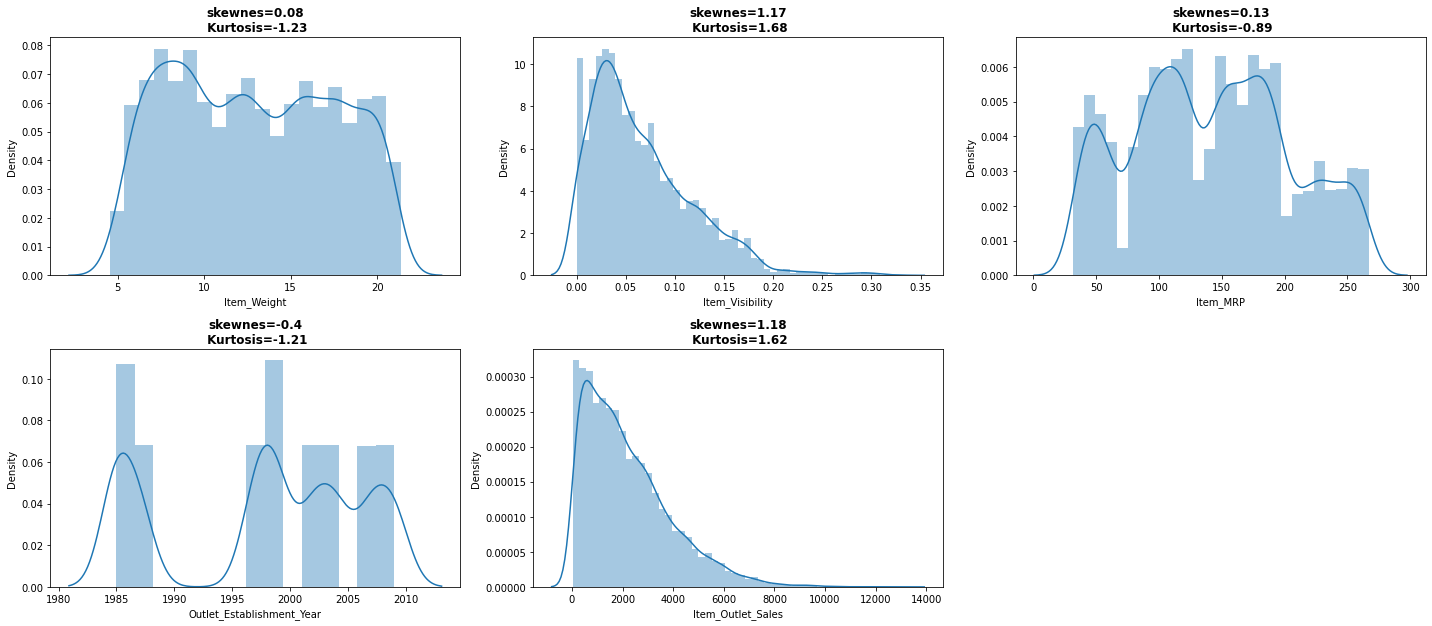

In [20]:
plt.figure(figsize=(20,30))
for i in range(len(numerical_feature)):
  plt.subplot(7 , 3 , i+1)
  sns.distplot(df[numerical_feature[i]])
  plt.title('skewnes='+str(round(df[numerical_feature[i]].skew() , 2)) +'\n Kurtosis='+str(round(df[numerical_feature[i]].kurt() , 2)) , 
            fontweight = 'bold')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

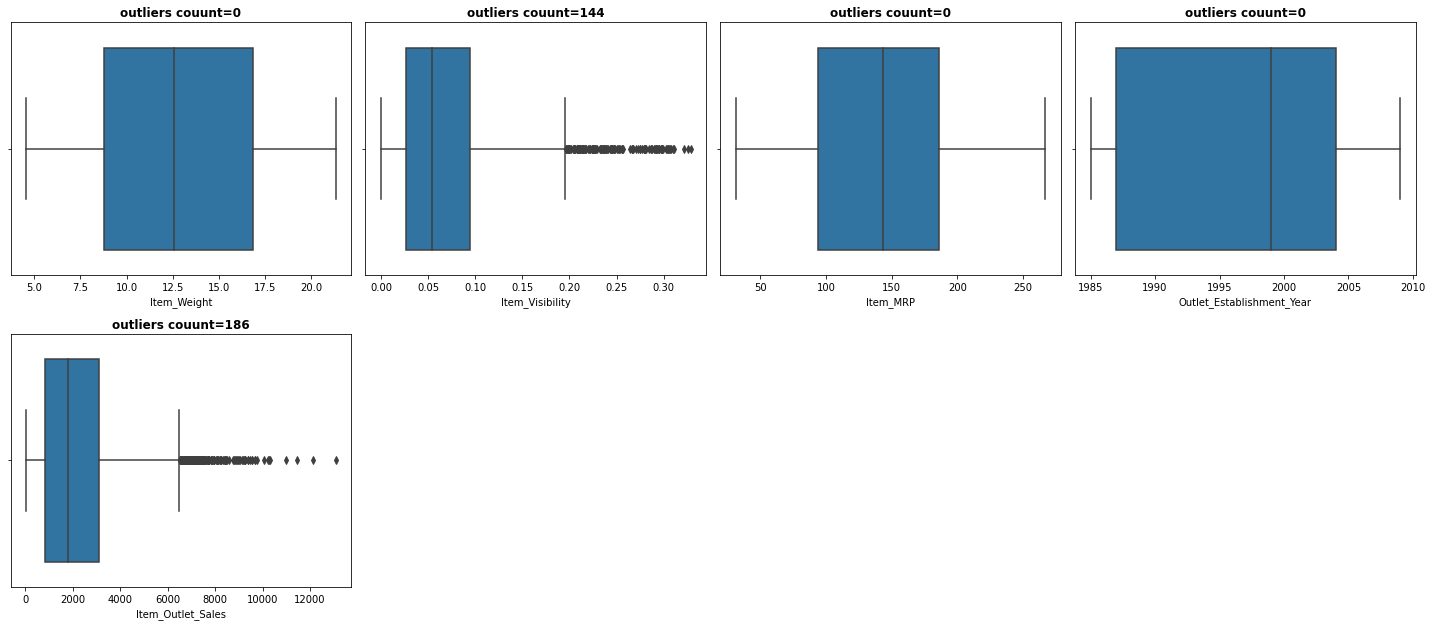

In [21]:
#Dealing with Outliers
plt.figure(figsize=(20,30))
for i in range(len(numerical_feature)):
  plt.subplot(7,4 , i+1)
  sns.boxplot(df[numerical_feature[i]] , orient='v')
  q1 = df[numerical_feature[i]].quantile(0.25)
  q3 = df[numerical_feature[i]].quantile(0.75)
  IQR = q3 - q1
  ub = q3 + (1.5*IQR)
  lb = q1 - (1.5*IQR)
  outlier_count = df[(df[numerical_feature[i]] > ub) | (df[numerical_feature[i]] < lb)][numerical_feature[i]].count()
  plt.title('outliers couunt='+str(outlier_count) , fontweight = 'bold')
  plt.tight_layout()

In [22]:
categorical_feature


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [23]:
numerical_feature

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
df[categorical_feature[1]].value_counts(normalize = True).index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Household',
 'Frozen Foods',
 'Dairy',
 'Canned',
 'Baking Goods',
 'Health and Hygiene',
 'Soft Drinks',
 'Meat',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

Item_Identifier:


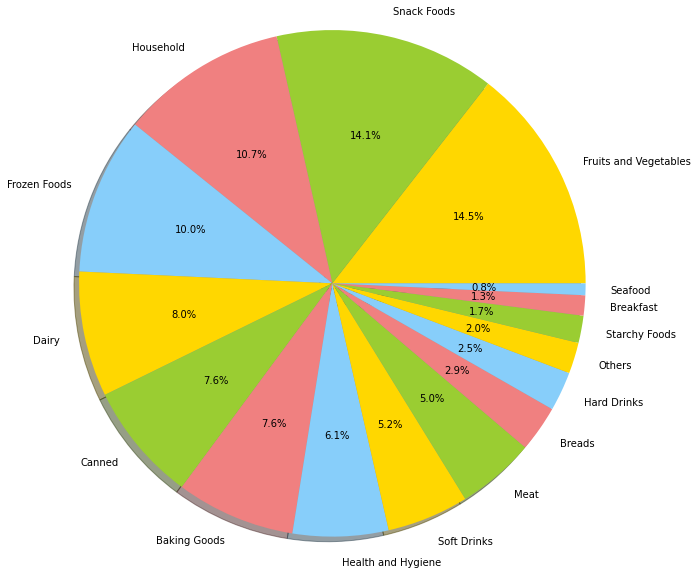

In [25]:
print('Item_Identifier:')
plt.figure(figsize=(10,10))
Labels = df[categorical_feature[1]].value_counts(normalize = True).index.to_list()
proportions = df[categorical_feature[1]].value_counts(normalize = True).to_list()
colors=['gold','yellowgreen','lightcoral','lightskyblue']

plt.pie(proportions,labels=Labels,colors=colors,autopct='%1.1f%%',shadow=True,)
plt.axis('equal')
plt.show()

conclusion:
1. Low fat product visible more than any product. approximat 59.7% visibility.
2. 2nd highly visible product is kind of regular
3. and remaining 3 reg , LF , low fat are 1.3% , 1.4% & 3.7% visible respectivily.

In [26]:
df[categorical_feature[0]].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
df[categorical_feature[2]].value_counts(normalize = True).to_list()

[0.45689514150171767, 0.3906428921969573, 0.15246196630132505]

Item_Type


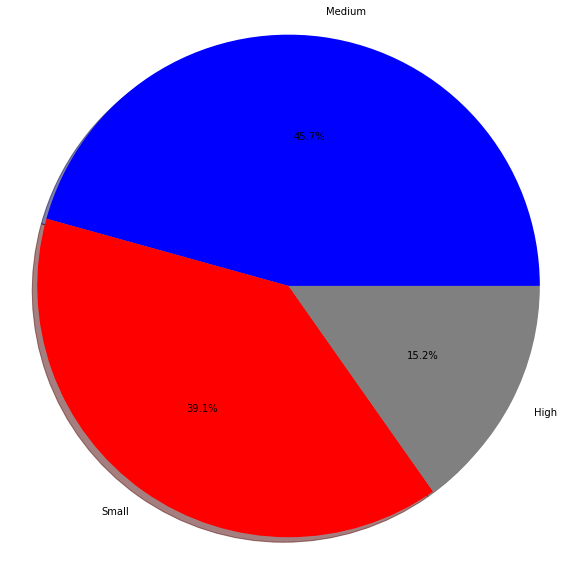

In [28]:
print('Item_Type')
plt.figure(figsize=(10,10))
Labels = df[categorical_feature[2]].value_counts(normalize = True).index.to_list()
proportions = df[categorical_feature[2]].value_counts(normalize = True).to_list()
colors=['blue' , 'red' , 'grey' , 'yellow' , 'green' , 'lightgreen' , 'orange' , 'lightblue' , 'pink' ,'violet']

plt.pie(proportions,labels=Labels,colors=colors,autopct='%1.1f%%',shadow=True,)
plt.axis('equal')
plt.show()

conclusion:
1. total item type are 16 out this 4 category are cover almost 50% of the total product
2. and remaining 50% are coverd by 12 category.

In [29]:
df[categorical_feature[3]].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

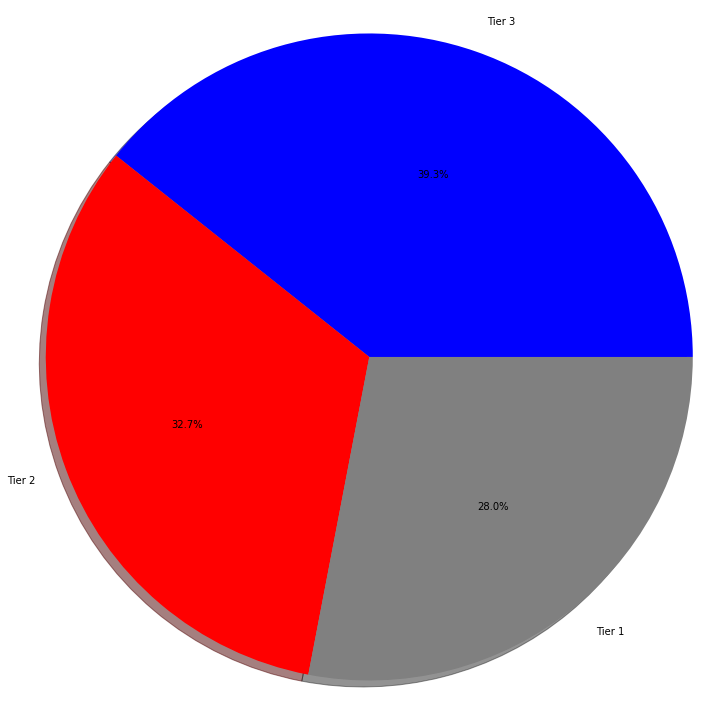

In [30]:
plt.figure(figsize = (10,10))
X = df[categorical_feature[3]].value_counts(normalize =  True).index.to_list()
Y = df[categorical_feature[3]].value_counts(normalize = True).to_list()
color = ['blue' , 'red' , 'grey' , 'yellow' , 'green' , 'lightgreen' , 'orange' , 'lightblue' , 'pink' ,'violet']
plt.pie(Y , labels = X , colors=color , autopct='%1.1f%%' , shadow=True)
plt.axis('equal')
plt.tight_layout()

In [31]:
numerical_feature

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Bivariate Distribution

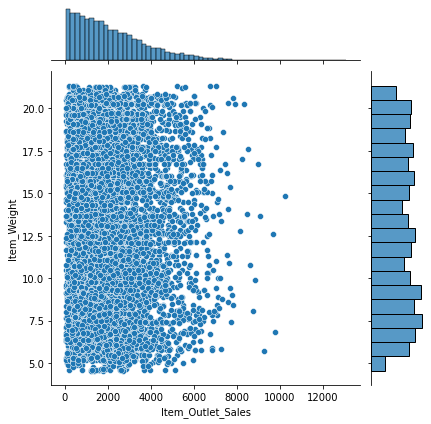

In [32]:
sns.jointplot(y = 'Item_Weight' , x = 'Item_Outlet_Sales' , data = df)

conclusion:
1. No matter product weight if price is less then sold are more.

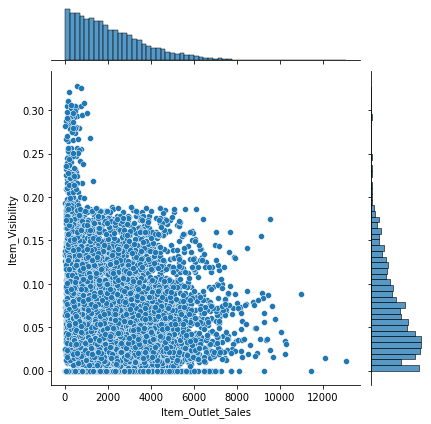

In [33]:
sns.jointplot(x = 'Item_Outlet_Sales' , y  = 'Item_Visibility' , data = df)

conclusion:
1. visibility are creat matter if product is visible more then chance to sold are more.

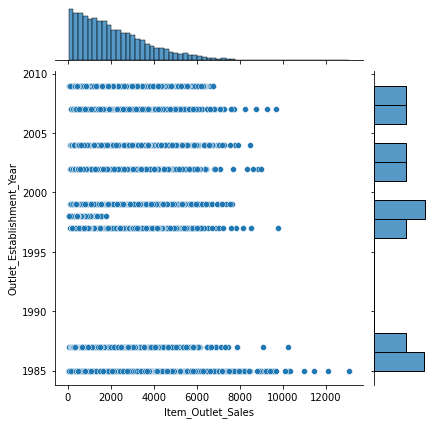

In [34]:
sns.jointplot(y = 'Outlet_Establishment_Year' , x = 'Item_Outlet_Sales' , data = df)

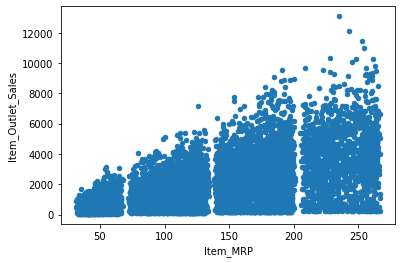

In [35]:
df.plot(kind = 'scatter' , y = 'Item_Outlet_Sales' , x = 'Item_MRP' )

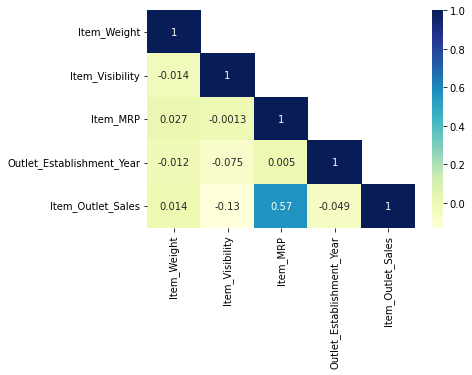

In [36]:
sns.heatmap(df.corr(method='pearson') , annot = True , cmap = 'YlGnBu' , mask = np.triu(df.corr() , k=1))

In [37]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [38]:
for i in df.columns:
    if(df[i].dtype!=type(object)):
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        for j in range(0,len(df[i])):
            if(df[i][j]>ub):
                df[i].replace(df[i][j],ub,inplace=True)
            elif(df[i][j]<lb):
                df[i].replace(df[i][j],lb,inplace=True)

In [39]:
for i in df.columns:
    if(df[i].dtype!=type(object)):
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=df[df[i]>ub][i]
        out_lb=df[df[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))

no of outliers in Item_Weight is 0
no of outliers in Item_Visibility is 0
no of outliers in Item_MRP is 0
no of outliers in Outlet_Establishment_Year is 0
no of outliers in Item_Outlet_Sales is 0


In [40]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [46]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
import statsmodels.api as sm
X = df.drop(['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] ,  axis = 1)
Y  = df['Item_Outlet_Sales']
X = sm.add_constant(X)
model = sm.OLS(Y , X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.793e+31
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        06:49:58   Log-Likelihood:             2.0486e+05
No. Observations:                8523   AIC:                        -4.097e+05
Df Residuals:                    8517   BIC:                        -4.097e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.529e-11   2.29e-11      0.668      0.504   -2.96e-11    6.02e-11
Item_Weight                 -1.3e-13   2.26e-14     -5.753      0.000   -1.74e-13   -8.57e-14
Item_Visibility           -8.287e-13   1.98e-12     -0.418      0.676   -4.71e-12    3.06e-12
Item_MRP                   1.481e-14   1.88e-15      7.870      0.000    1.11e-14    1.85e-14
Outlet_Establishment_Year -4.254e-15   1.14e-14     -0.372      0.710   -2.67e-14    1.82e-14
Item_Outlet_Sales             1.0000   7.27e-17   1.38e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      453.823   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.747
Skew:                          -0.610   Prob(JB):                    9.26e-116
Kurtosis:                       2.969   Cond. No.                     7.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Engineering

In [48]:
categorical_feature

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [49]:
df[categorical_feature[0]].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [50]:
Item_Fat_Content = pd.get_dummies(df[categorical_feature[0]] , drop_first=True)
Item_Fat_Content

,Low Fat,Regular,low fat,reg
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
8518,1,0,0,0
8519,0,1,0,0
8520,1,0,0,0
8521,0,1,0,0


In [51]:
df[categorical_feature[1]].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [52]:
Item_type = pd.get_dummies(df[categorical_feature[1]] , drop_first=True)
Item_type

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
categorical_feature

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [54]:
df[categorical_feature[2]].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [55]:
Outlet_size = pd.get_dummies(df[categorical_feature[2]] , drop_first=True)
Outlet_size

,Medium,Small
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
8518,0,0
8519,1,0
8520,0,1
8521,1,0


In [57]:
df[categorical_feature[3]].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [58]:
Outlet_Location_Type = pd.get_dummies(df[categorical_feature[3]] , drop_first=True)
Outlet_Location_Type

,Tier 2,Tier 3
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
8518,0,1
8519,1,0
8520,1,0
8521,0,1


In [59]:
df[categorical_feature[4]].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [60]:
Outlet_Type = pd.get_dummies(df[categorical_feature[4]] , drop_first=True)
Outlet_Type

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0
...,...,...,...
8518,1,0,0
8519,1,0,0
8520,1,0,0
8521,0,1,0


In [61]:
numerical_feature

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [62]:
num_feature = df.reindex(columns = ['Item_MRP', 'Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility'])
num_feature

,Item_MRP,Item_Outlet_Sales,Item_Weight,Item_Visibility
0,249.8092,3735.1380,9.300,0.016047
1,48.2692,443.4228,5.920,0.019278
2,141.6180,2097.2700,17.500,0.016760
3,182.0950,732.3800,19.200,0.000000
4,53.8614,994.7052,8.930,0.000000
...,...,...,...,...
8518,214.5218,2778.3834,6.865,0.056783
8519,108.1570,549.2850,8.380,0.046982
8520,85.1224,1193.1136,10.600,0.035186
8521,103.1332,1845.5976,7.210,0.145221


In [63]:
data = pd.concat([Item_Fat_Content , Item_type , Outlet_size , Outlet_Location_Type , Outlet_Type , df[numerical_feature]] , axis = 1)
data

,Low Fat,Regular,low fat,reg,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,...,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,9.300,0.016047,249.8092,1999,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,5.920,0.019278,48.2692,2009,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,17.500,0.016760,141.6180,1999,2097.2700
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,19.200,0.000000,182.0950,1998,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,6.865,0.056783,214.5218,1987,2778.3834
8519,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,8.380,0.046982,108.1570,2002,549.2850
8520,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,10.600,0.035186,85.1224,2004,1193.1136
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,7.210,0.145221,103.1332,2009,1845.5976


## Test Data

In [62]:
from google.colab import files
upload = files.upload()

Saving BigMart_test.csv to BigMart_test.csv


In [7]:
import pandas as pd
import numpy as np

In [64]:
df_test = pd.read_csv('BigMart_test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
df1 = df_test.drop(['Item_Identifier' , 'Outlet_Identifier'] , axis = 1)
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [66]:
df1.shape

(5681, 9)

In [67]:
print("Test data Info")
print("-"*75)
print(df1.info())

print("Test data shape")
print("-"*75)
print(df1.shape)

print('duplucate data:')
print("-"*75)
print(df1.drop_duplicates())

print('missing data:')
print("-"*75)
feature_na =  [feature for feature in df1.columns if df1[feature].isnull().sum() > 1]
for feature in feature_na:
  print("{} has {} % missing values".format(feature ,  np.round(df1[feature].isnull().sum()/len(df1)*100 , 2)))


#Numerical Feature
numerical_feature1 = df1.dtypes[df1.dtypes!='object'].index
print('numerical feature:' , len(numerical_feature))

categorical_feature1 = df1.dtypes[df1.dtypes=='object'].index
print('categorical feature:' , len(categorical_feature))
print("-"*75)

#Dealing with Outliers
for i in df1.columns:
    if(df1[i].dtype!=type(object)):
        q1=df1[i].quantile(0.25)
        q3=df1[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        for j in range(0,len(df1[i])):
            if(df1[i][j]>ub):
                df1[i].replace(df1[i][j],ub,inplace=True)
            elif(df1[i][j]<lb):
                df1[i].replace(df1[i][j],lb,inplace=True)

print("-"*75)
for i in df1.columns:
    if(df1[i].dtype!=type(object)):
        q1=df1[i].quantile(0.25)
        q3=df1[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=df1[df_test[i]>ub][i]
        out_lb=df1[df_test[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))                
print("-"*75)


df1.fillna(value = 0 , axis = 0 , inplace = True)
df1.isnull().sum()
print("-"*75)

Item_Fat_Content = pd.get_dummies(df1[categorical_feature1[0]] , drop_first=True)
Item_type = pd.get_dummies(df1[categorical_feature1[1]] , drop_first=True)
Outlet_size = pd.get_dummies(df1[categorical_feature1[2]] , drop_first=True)
Outlet_Location_Type = pd.get_dummies(df1[categorical_feature1[3]] , drop_first=True)
Outlet_Type = pd.get_dummies(df1[categorical_feature1[4]] , drop_first=True)
print("-"*75)

data1 = pd.concat([Item_Fat_Content , Item_type , Outlet_size , Outlet_Location_Type , Outlet_Type , df1[numerical_feature1]] , axis = 1)
print(data1)
print("-"*75)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB
None
Test data shape
---------------------------------------------------------------------------
(5681, 9)
duplucate data:


## Scaling data

In [64]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(data.drop('Item_Outlet_Sales' ,  axis = 1))
Y = scale.fit_transform(data['Item_Outlet_Sales'].values.reshape(-1,1))

In [65]:
X

array([[1.        , 0.        , 0.        , ..., 0.08188275, 0.92750715,
        0.58333333],
       [0.        , 1.        , 0.        , ..., 0.09836878, 0.0720684 ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.08551974, 0.46828841,
        0.58333333],
       ...,
       [1.        , 0.        , 0.        , ..., 0.17954101, 0.22849221,
        0.79166667],
       [0.        , 1.        , 0.        , ..., 0.741001  , 0.30493925,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.22899533, 0.18750976,
        0.5       ]])

In [66]:
Y

array([[0.57228141],
       [0.06340384],
       [0.31907776],
       ...,
       [0.17930112],
       [0.28017086],
       [0.11322114]])

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func = f_regression , k=20)
fit=bestfeatures.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(data.drop('Item_Outlet_Sales',axis=1).columns)
#Concat two Data Frames for Better Visulaization
featureScores=pd.concat([df_columns,df_scores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores)

                        Specs        Score
0                     Low Fat     1.534888
1                     Regular     4.719613
2                     low fat     0.421507
3                         reg     1.897777
4                      Breads     0.081164
5                   Breakfast     0.331185
6                      Canned     0.714035
7                       Dairy     0.174796
8                Frozen Foods     0.701176
9       Fruits and Vegetables     5.153444
10                Hard Drinks     0.076238
11         Health and Hygiene     5.486669
12                  Household     2.376387
13                       Meat     0.061611
14                     Others     3.460880
15                    Seafood     0.703568
16                Snack Foods     4.688011
17                Soft Drinks     5.755520
18              Starchy Foods     2.176644
19                     Medium    43.897831
20                      Small    81.243255
21                     Tier 2    36.966422
22         

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
imp_feature = featureScores.nlargest(20 , 'Score')['Specs']
imp_feature

28                     Item_MRP
25            Supermarket Type3
23            Supermarket Type1
27              Item_Visibility
20                        Small
19                       Medium
21                       Tier 2
22                       Tier 3
29    Outlet_Establishment_Year
24            Supermarket Type2
17                  Soft Drinks
11           Health and Hygiene
9         Fruits and Vegetables
1                       Regular
16                  Snack Foods
14                       Others
12                    Household
18                Starchy Foods
3                           reg
0                       Low Fat
Name: Specs, dtype: object

In [69]:
X

array([[1.        , 0.        , 0.        , ..., 0.08188275, 0.92750715,
        0.58333333],
       [0.        , 1.        , 0.        , ..., 0.09836878, 0.0720684 ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.08551974, 0.46828841,
        0.58333333],
       ...,
       [1.        , 0.        , 0.        , ..., 0.17954101, 0.22849221,
        0.79166667],
       [0.        , 1.        , 0.        , ..., 0.741001  , 0.30493925,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.22899533, 0.18750976,
        0.5       ]])

In [70]:
X = data[imp_feature]
Y = data['Item_Outlet_Sales']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(data['Item_Outlet_Sales'].values.reshape(-1,1))

In [71]:
Y

array([[0.57228141],
       [0.06340384],
       [0.31907776],
       ...,
       [0.17930112],
       [0.28017086],
       [0.11322114]])

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

**APPLYING SOME OF THE MOST POWERFUL MACHINE LEARNING ALGORITHUMNS**


**Linear Regression:**

In [111]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train , Y_train)
LR_score_train = model_LR.score(X_train , Y_train)
print('Train score' , LR_score_train)

LR_score_test = model_LR.score(X_test , Y_test)
print('Test score' , LR_score_test)

pred_LR = model_LR.predict(X_test)

from sklearn import metrics

print('MAE SCORE:', metrics.mean_absolute_error(Y_test ,  pred_LR))
print('MSE SCORE:', metrics.mean_squared_error(Y_test , pred_LR))
RMSE_LR = np.sqrt(metrics.mean_squared_error(Y_test , pred_LR))
print('RMSE SCORE:' , RMSE_LR)
final_results = []
dict_LR = {'MODEL': 'Linear Regressionn',
           'Train_ACCURACY':LR_score_train,
           'Test_ACCURACY': LR_score_test,
           'RMSE' : RMSE_LR}
final_results.append(dict_LR)          

Train score 0.5777159147073654
Test score 0.5713866587952451
MAE SCORE: 0.12830997220533474
MSE SCORE: 0.027801981613237225
RMSE SCORE: 0.16673926236263978


**Ridge Regression:**

In [112]:
from sklearn import linear_model
model_LR_Ridge = linear_model.RidgeCV()
model_LR_Ridge.fit(X_train , Y_train)

LR_Ridge_score_train = model_LR_Ridge.score(X_train , Y_train)
print('Train score' , LR_Ridge_score_train)

LR_Ridge_score_test = model_LR_Ridge.score(X_test , Y_test)
print('Test score' , LR_Ridge_score_test)

pred_Ridge = model_LR_Ridge.predict(X_test)

from sklearn import metrics

print('MAE SCORE:' , metrics.mean_absolute_error(Y_test , pred_Ridge))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , pred_Ridge))
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(Y_test , pred_Ridge))
print('RMSE SCORE:' , RMSE_Ridge)

dict_LR_Ridge = {
    'MODEL' : 'Ridge Regression',
    'Train_ACCURACY' : LR_Ridge_score_train,
    'Test_ACCURACY' : LR_Ridge_score_test,
    'RMSE' : RMSE_Ridge
}
final_results.append(dict_LR_Ridge)

Train score 0.5777153790752952
Test score 0.5713855893604548
MAE SCORE: 0.12830678864876366
MSE SCORE: 0.027802050982068095
RMSE SCORE: 0.1667394703783963


**Lasso Regression:**

In [113]:
from sklearn import linear_model
model_LR_Lasso = linear_model.LassoCV()
model_LR_Lasso.fit(X_train , Y_train)
LR_Lasso_score_train = model_LR_Lasso.score(X_train , Y_train)
print('Train score' , LR_Lasso_score_train)

LR_Lasso_score_test = model_LR_Lasso.score(X_test , Y_test)
print('Test score' , LR_Lasso_score_test)

pred_Lasso = model_LR_Lasso.predict(X_test)

print('MAE SCORE;' , metrics.mean_absolute_error(Y_test , pred_Lasso))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , pred_Lasso))
RMSE_Lasso = np.sqrt(metrics.mean_squared_error(Y_test ,  pred_Lasso))
print('RMSE SCORE:' , RMSE_Lasso)

dict_LR_Lasso = { 
    'MODEL' : 'Lasso Regression',
    'Train_ACCURACY' : LR_Lasso_score_train,
    'Test_ACCURACY' : LR_Lasso_score_test,
    'RMSE' : RMSE_Lasso

}
final_results.append(dict_LR_Lasso)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.5775956565321818
Test score 0.5715030496300295
MAE SCORE; 0.1282411768054489
MSE SCORE: 0.027794431927920544
RMSE SCORE: 0.1667166216305997


**Decision Tree:**

In [114]:
import sklearn.tree as tree
model_DT = tree.DecisionTreeRegressor(max_depth = 3)
model_DT.fit(X_train , Y_train)

DT_score_train = model_DT.score(X_train , Y_train)
print('Train score' , DT_score_train)

DT_score_test = model_DT.score(X_test ,  Y_test)
print('Test score' , DT_score_test)

DT_pred = model_DT.predict(X_test)

print('MAE SCORE:' , metrics.mean_absolute_error(Y_test , DT_pred))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , DT_pred))
RMSE_DT = np.sqrt(metrics.mean_squared_error(Y_test , DT_pred))
print('RMSE SCORE:' , RMSE_DT)

dict_DT = {
    'MODEL' : 'Decsison Tree',
    'Train_ACCURACY' : DT_score_train,
    'Test_ACCURACY' : DT_score_test,
    'RMSE' : RMSE_DT
}
final_results.append(dict_DT)

Train score 0.4745177622974871
Test score 0.4609861221617513
MAE SCORE: 0.1443861728289178
MSE SCORE: 0.034963106558504944
RMSE SCORE: 0.1869842414710527


**Gradient Boosting Regressor:**

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train , Y_train)

GBR_score_train = model_GBR.score(X_train , Y_train)
print('Train Score' , GBR_score_train)

GBR_score_test = model_GBR.score(X_test , Y_test)
print('Test score' , GBR_score_test)

GBR_pred = model_GBR.predict(X_test)

print('MAE SCORE:' , metrics.mean_absolute_error(Y_test , GBR_pred))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , GBR_pred))
RMSE_GBR = np.sqrt(metrics.mean_squared_error(Y_test , GBR_pred))
print('RMSE SCORE:' , RMSE_GBR)

dict_GBR = {
    'MODEL' : 'Gradient Boosting Regressor',
    'Train_ACCURACY' : GBR_score_train,
    'Test_ACCURACY' : GBR_score_test,
    'RMSE' : RMSE_GBR
}
final_results.append(dict_GBR)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score 0.641868771237184
Test score 0.5938331313213973
MAE SCORE: 0.11937158377562027
MSE SCORE: 0.02634599236497909
RMSE SCORE: 0.16231448599856727


**Histogram-Based Gradient Boosting Regressor:**

In [116]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model_HBR = HistGradientBoostingRegressor()
model_HBR.fit(X_train , Y_train)

HBR_score_train = model_HBR.score(X_train , Y_train)
print('Train score' , HBR_score_train)

HBR_score_test = model_HBR.score(X_test , Y_test)
print('Test Score' , HBR_score_test)

HBR_pred = model_HBR.predict(X_test)

print('MAE SCORE:' , metrics.mean_absolute_error(Y_test , HBR_pred))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , HBR_pred))
RMSE_HBR = np.sqrt(metrics.mean_squared_error(Y_test , HBR_pred))
print('RMSE SCORE:' , RMSE_HBR)

dict_HBR = {
    'MODEL' : 'Hist Gradient Bossting Regressor',
    'Train_ACCURACY' : HBR_score_train,
    'Test_ACCURACY' : HBR_score_test,
    'RMSE' : RMSE_HBR
}
final_results.append(dict_HBR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7132585323659753
Test Score 0.5870367666936067
MAE SCORE: 0.11811636871512554
MSE SCORE: 0.026786838195600175
RMSE SCORE: 0.16366685124239477


**Gradient Boosting With XGBoost Regressor:**

In [117]:
from xgboost import XGBRegressor
model_XGR = XGBRegressor()
model_XGR.fit(X_train , Y_train)

XGR_score_train = model_XGR.score(X_train , Y_train)
print('Train Score' , XGR_score_train)

XGR_score_test = model_XGR.score(X_test , Y_test)
print('Test score' , XGR_score_test)

XGR_pred = model_XGR.predict(X_test)

print('MAE SCORE:' , metrics.mean_absolute_error(Y_test , XGR_pred))
print('MSE SCORE:' , metrics.mean_squared_error(Y_test , XGR_pred))
RMSE_XGR = np.sqrt(metrics.mean_squared_error(Y_test , XGR_pred))
print('RMSE SCORE:' , RMSE_XGR)

dict_XGR = {
    'MODEL' : 'XGBoost Regressor',
    'Train_ACCURACY' : XGR_score_train,
    'Test_ACCURACY' : XGR_score_test,
    'RMSE' : RMSE_XGR

}
final_results.append(dict_XGR)

[07:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score 0.6402034889642091
Test score 0.5931797044137492
MAE SCORE: 0.11945717769928343
MSE SCORE: 0.026388376866639633
RMSE SCORE: 0.16244499643460747


**Gradient Boosting With LightGBM Regressor:**

In [118]:
from lightgbm import LGBMRegressor
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train , Y_train)

LGBM_score_train = model_LGBM.score(X_train , Y_train)
print('Train score' , LGBM_score_train)

LGBM_score_test = model_LGBM.score(X_test , Y_test)
print('Test score' , LGBM_score_test)

LGBM_pred = model_LGBM.predict(X_test)

print('MAE SCORE' , metrics.mean_absolute_error(Y_test , LGBM_pred))
print('MSE SCORE' , metrics.mean_squared_error(Y_test , LGBM_pred))
RMSE_LGBM = np.sqrt(metrics.mean_squared_error(Y_test , LGBM_pred))
print('RMSE' , RMSE_LGBM)

dict_LGBM = {
    'MODEL' : 'LGBM Regressor',
    'Train_ACCURACY' : LGBM_score_train,
    'Test_ACCURACY' : LGBM_score_test,
    'RMSE' : RMSE_LGBM 
}
final_results.append(dict_LGBM)

Train score 0.7160927108785062
Test score 0.583555588983669
MAE SCORE 0.11881218837091471
MSE SCORE 0.027012644602867057
RMSE 0.16435523904903993


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
import pandas as pd
df_results = pd.DataFrame(final_results)
df_results['ACCURACY'] = ((df_results['Train_ACCURACY']+df_results['Test_ACCURACY'])/2)*100
(df_results.sort_values(by=['ACCURACY','RMSE'],ascending=False)
    .reset_index(drop=True)
    .style.background_gradient(cmap='Greens'))

,MODEL,Train_ACCURACY,Test_ACCURACY,RMSE,ACCURACY
0,Hist Gradient Bossting Regressor,0.713259,0.587037,0.163667,65.014765
1,LGBM Regressor,0.716093,0.583556,0.164355,64.982415
2,Gradient Boosting Regressor,0.641869,0.593833,0.162314,61.785095
3,XGBoost Regressor,0.640203,0.593180,0.162445,61.669160
4,Linear Regressionn,0.577716,0.571387,0.166739,57.455129
5,Ridge Regression,0.577715,0.571386,0.166739,57.455048
6,Lasso Regression,0.577596,0.571503,0.166717,57.454935
7,Decsison Tree,0.474518,0.460986,0.186984,46.775194


## Thank you !!